<a href="https://colab.research.google.com/github/devpatel0005/Baseball-Player-Salary-Prediction/blob/main/baseball_player_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/devpatel0005/Baseball-Player-Salary-Prediction/refs/heads/main/Player%20-%20Player.csv')

In [ ]:
df.sample(5)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
97,-Enos Cabell,277,71,2,27,29,14,15,5952,1647,...,753,596,259,N,W,360,32,5,NaN,N
234,-Paul Molitor,437,123,9,62,55,40,9,4139,1203,...,676,390,364,A,E,82,170,15,1260.0,A
55,-Candy Maldonado,405,102,18,49,85,20,6,950,231,...,99,138,64,N,W,161,10,3,415.0,N
87,-Dan Pasqua,280,82,16,44,45,47,2,428,113,...,61,70,63,A,E,148,4,2,110.0,A
84,-Dale Murphy,614,163,29,89,83,75,11,5017,1388,...,813,822,617,N,W,303,6,6,1900.0,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [ ]:
df.isnull().mean()

,0
Unnamed: 0,0.00000
AtBat,0.00000
Hits,0.00000
HmRun,0.00000
Runs,0.00000
RBI,0.00000
Walks,0.00000
Years,0.00000
CAtBat,0.00000
CHits,0.00000


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
num_cols=df.select_dtypes(include='number').columns

In [ ]:
num_cols

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')

In [ ]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['League', 'Division', 'NewLeague'], dtype='object')

In [ ]:
for i in cat_cols:
  print(df[i].value_counts(),'\n')

League
A    175
N    147
Name: count, dtype: int64 

Division
W    165
E    157
Name: count, dtype: int64 

NewLeague
A    176
N    146
Name: count, dtype: int64 



In [ ]:
df['Salary'].describe()

,Salary
count,263.000000
mean,535.925882
std,451.118681
min,67.500000
25%,190.000000
50%,425.000000
75%,750.000000
max,2460.000000


In [ ]:
df['Salary']=df['Salary'].fillna(-1)

In [ ]:
df.isnull().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


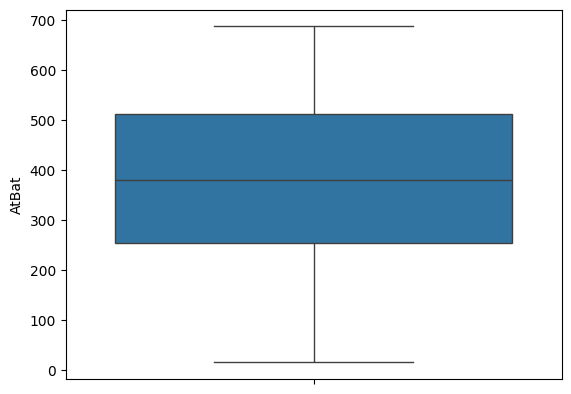

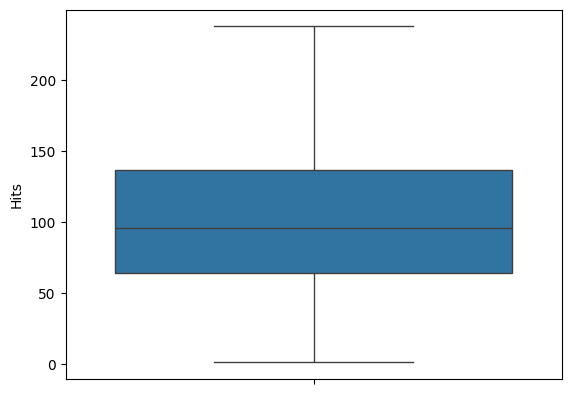

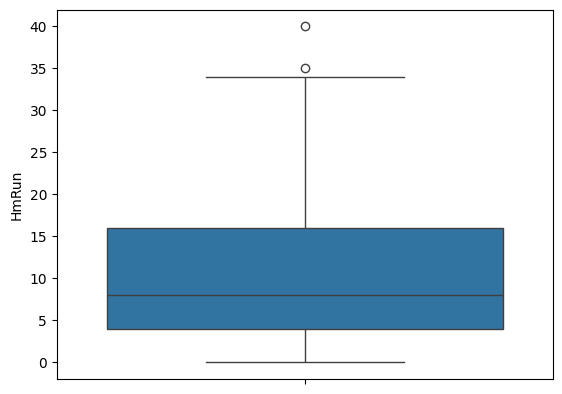

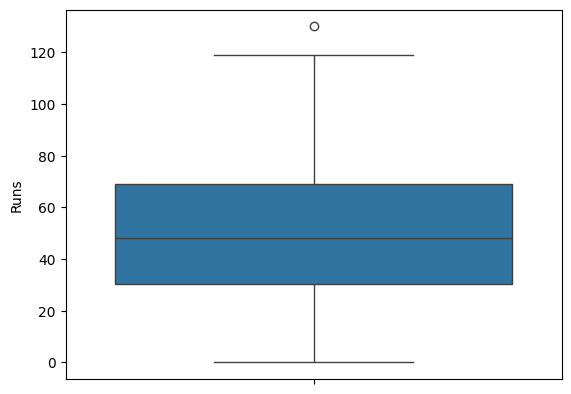

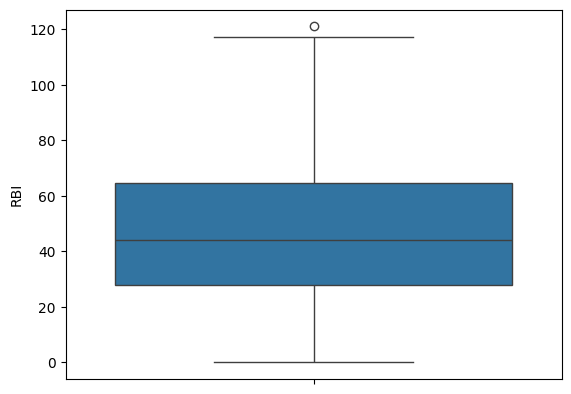

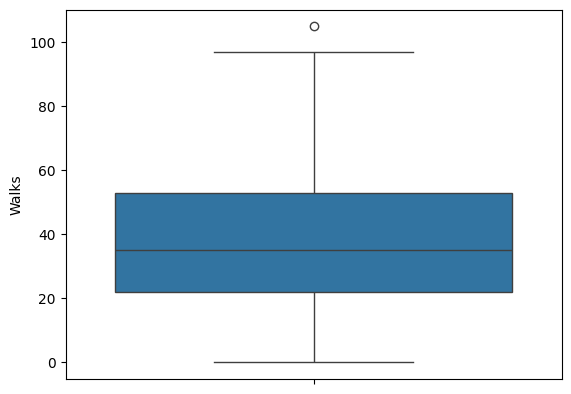

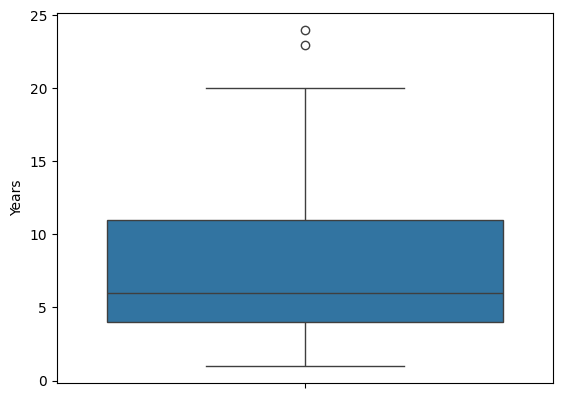

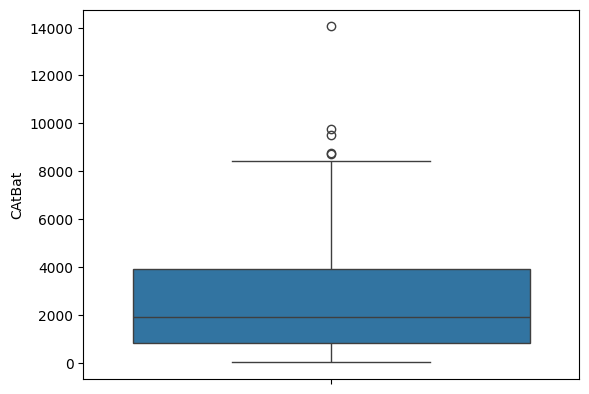

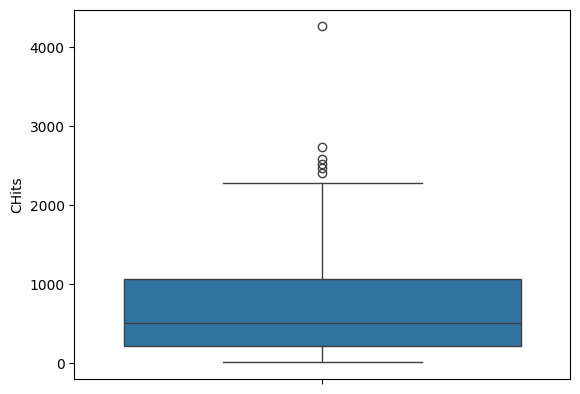

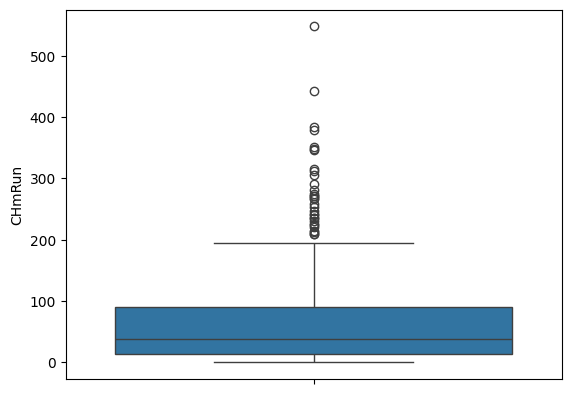

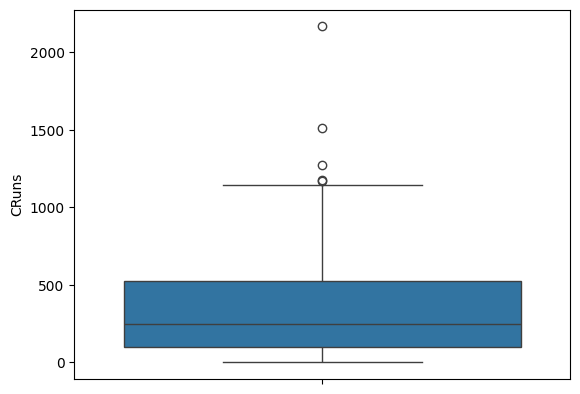

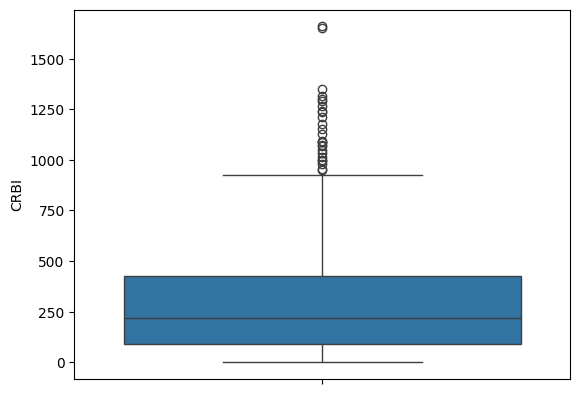

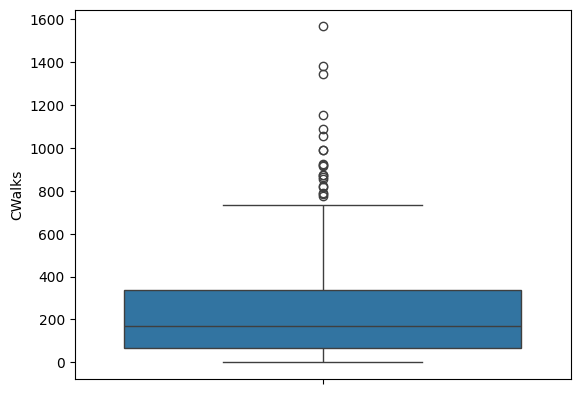

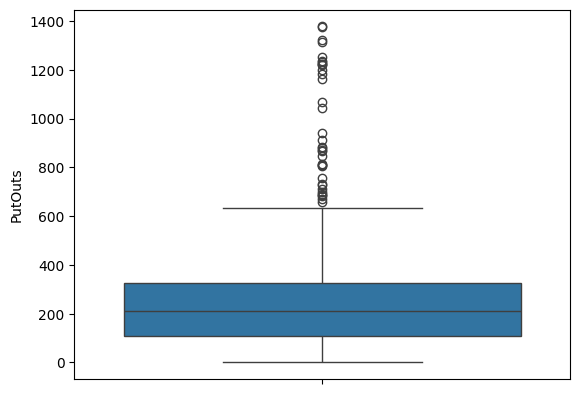

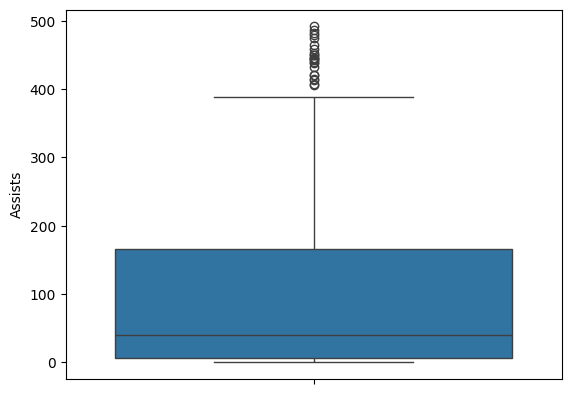

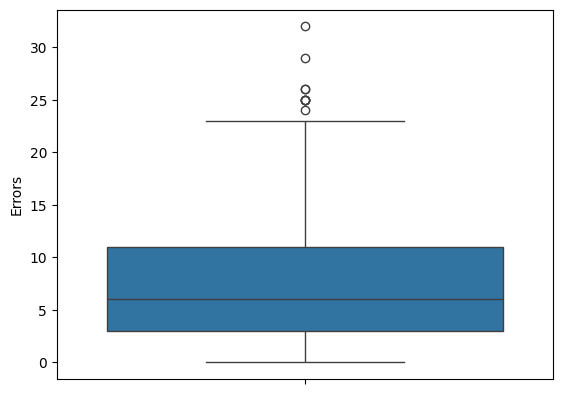

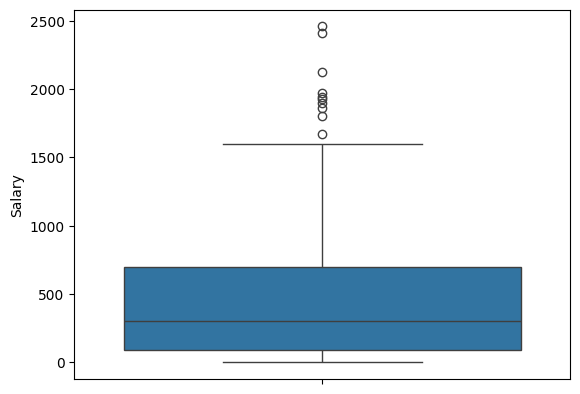

In [ ]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
cols=num_cols.drop('Salary')
def manage_outliers(df,cols):
  q1=df[cols].quantile(0.25)
  q3=df[cols].quantile(0.75)
  iqr=q3-q1
  lower=q1-1.5*iqr
  upper=q3+1.5*iqr
  df[cols]=np.where(df[cols]>upper,upper,np.where(df[cols]<lower,lower,df[cols]))
  return df
df=manage_outliers(df,cols)

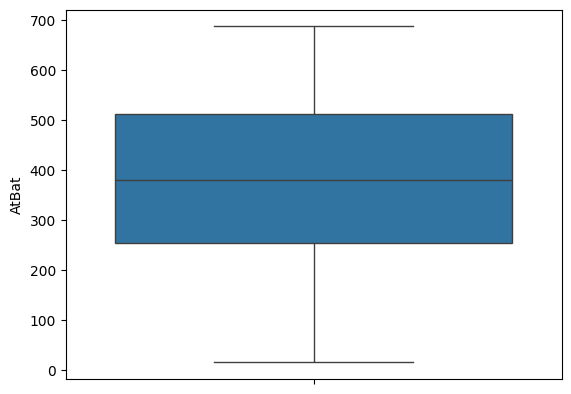

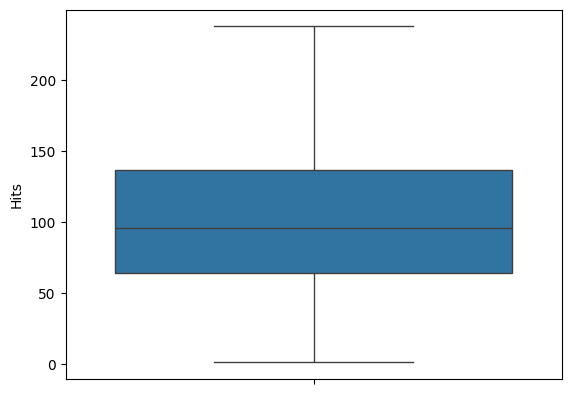

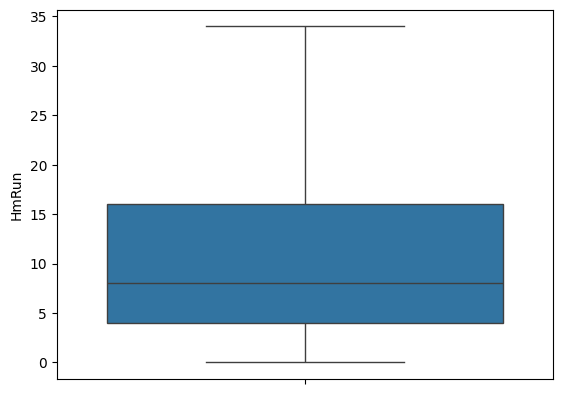

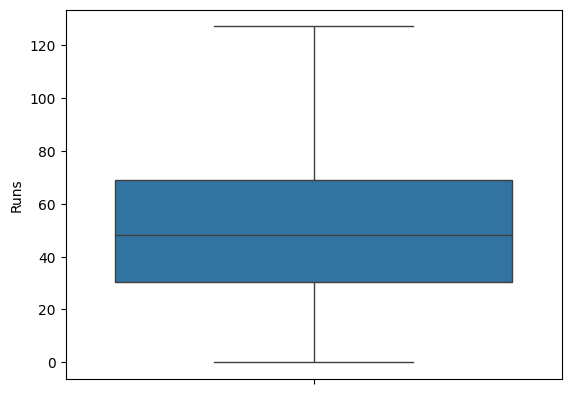

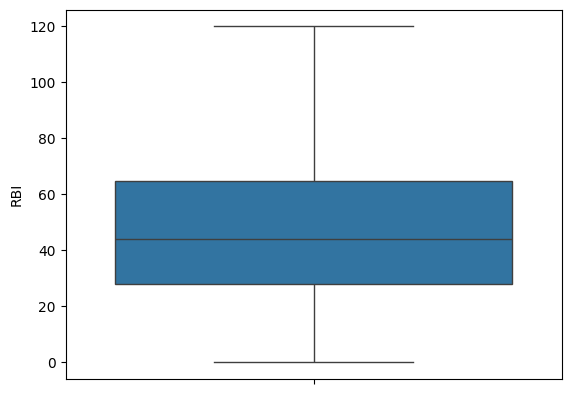

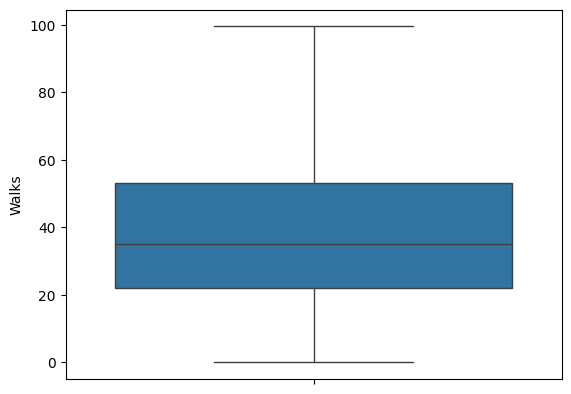

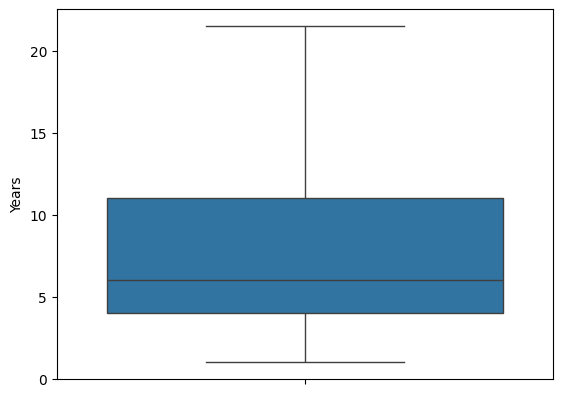

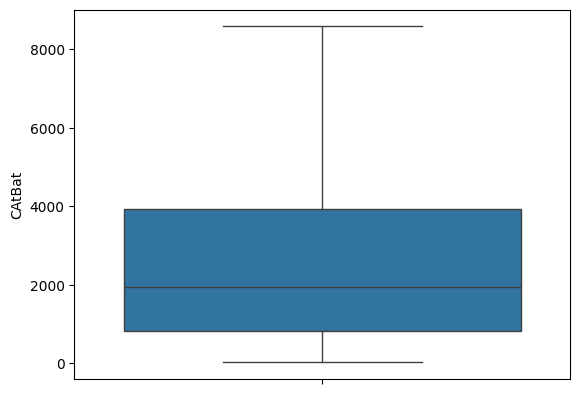

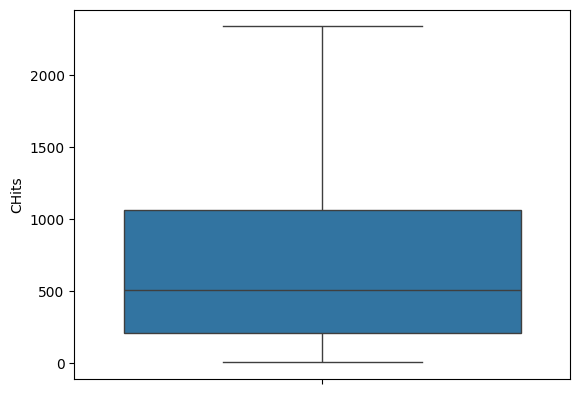

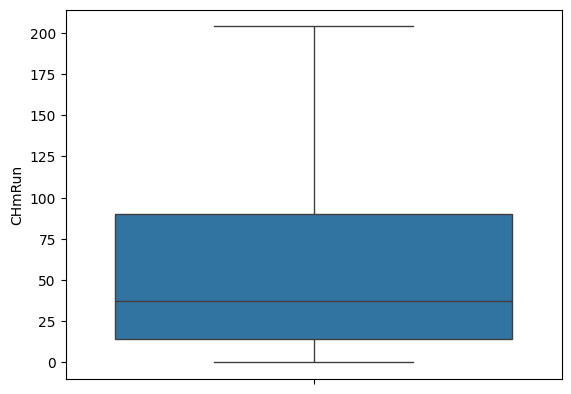

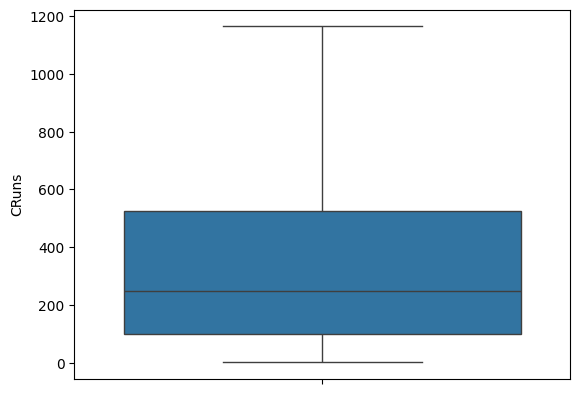

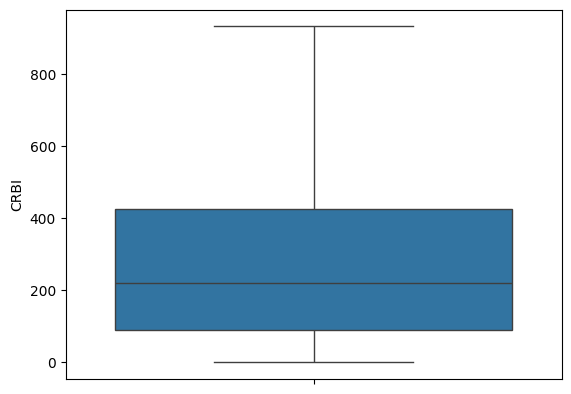

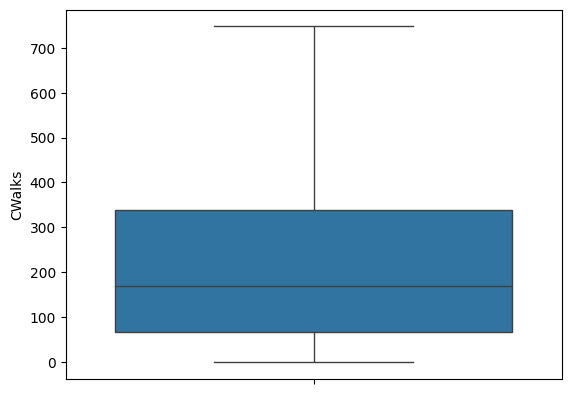

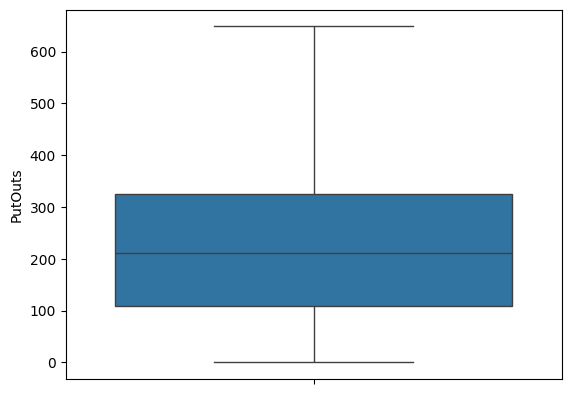

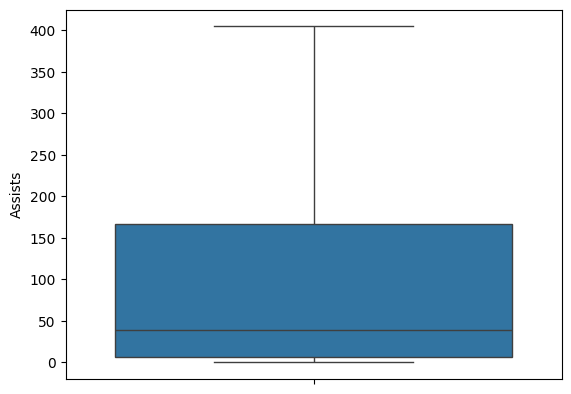

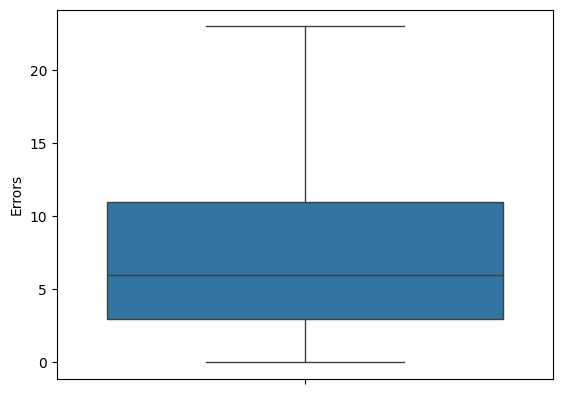

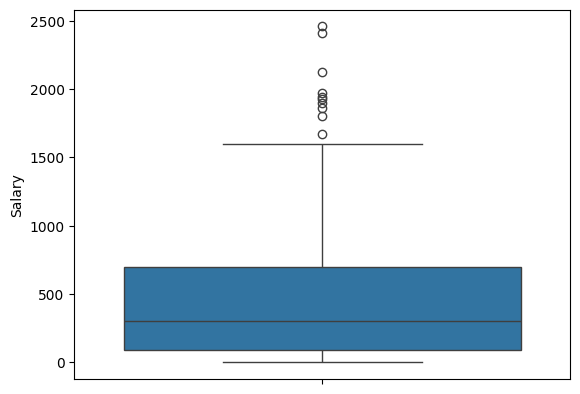

In [ ]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
# see here we removed the outliers by capping them between their iqr range

In [ ]:
x=df.drop('Salary',axis=1)
y=df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
num_cols

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')

<Axes: >

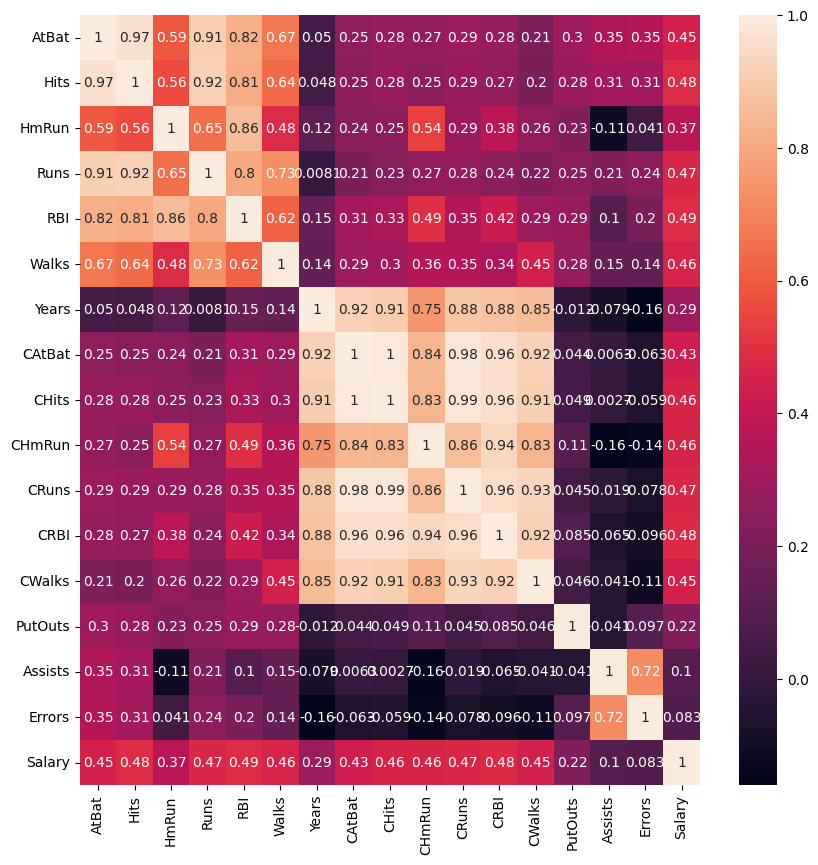

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num_cols].corr(),annot=True)

In [ ]:
# Now managing the multicollinearity
df[num_cols].corr()['Salary'].sort_values(ascending=False)

,Salary
Salary,1.000000
RBI,0.485047
Hits,0.483696
CRBI,0.475700
CRuns,0.473807
Runs,0.472803
Walks,0.462906
CHits,0.459743
CHmRun,0.458792
AtBat,0.447381


In [ ]:
# here we are not doing anything since for tree based models multicollinearity is not that much important
# BUT THE COLUMNS WHICH HAVE VERY LESS CORRELATED TO THE TARGET FEATURES WE WILL REMOVE THEM
df.drop(["Assists", "NewLeague", "Errors", "League"],axis=1)
num_cols=num_cols.drop(["Assists", "Errors"])

In [ ]:
# in the transformation we have to apply on all the numerical columns except the target variable
num_cols=num_cols.drop('Salary')

In [ ]:
num_cols

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts'],
      dtype='object')

In [ ]:
trf1=ColumnTransformer([
    ('cat_converter',OneHotEncoder(sparse_output=False,drop='first'),cat_cols),
    ('powertrans',PowerTransformer(method='yeo-johnson'),num_cols)
],remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

In [ ]:
trf3=RandomForestRegressor()

In [ ]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf3',trf3)
])

In [ ]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_converter',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  Index(['League', 'Division', 'NewLeague'], dtype='object')),
                                                 ('powertrans',
                                                  PowerTransformer(),
                                                  Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('trf3', RandomForestRegressor())])

In [ ]:
y_pred_train=pipe.predict(x_train)
y_pred_test=pipe.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print("Test accuracy",r2_score(y_test,y_pred_test))
print("Train accuracy",r2_score(y_train,y_pred_train))


Test accuracy 0.6374505230941965
Train accuracy 0.9043565492590032


## Update Param Grid for Multiple Models

### Subtask:
Modify the `param_grid` to include different regression models (e.g., `DecisionTreeRegressor`, `RandomForestRegressor`) and a range of hyperparameters for each. The model itself will be treated as a hyperparameter for the 'trf3' step of the pipeline.


In [ ]:
param_grid = [
    {
        'trf3': [RandomForestRegressor(random_state=0)],
        'trf3__n_estimators': [5,10,15,30,50],
        'trf3__max_depth': [5,10, 20,50,80],
        'trf3__min_samples_leaf': [1, 5, 10,20]
    },
    {
        'trf3': [DecisionTreeRegressor(random_state=0)],
        'trf3__max_depth': [10, 20, None],
        'trf3__min_samples_leaf': [1, 5, 10]
    }
    ,
    {
        'trf3':[LinearRegression()]
    }
]

In [ ]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_converter',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         Index(['League', 'Division', 'NewLeague'], dtype='object')),
                                                                        ('powertrans',
                                                                         PowerTransformer(),
                                                                         Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'C...
                                       ('trf3', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'trf3': [RandomForestRegressor(random_state=0)],
                          'trf3__max_depth': [5, 10, 20, 50, 80],
                          'trf3__min_samples_leaf': [1, 5, 10, 20],
                          'trf3__n_estimators': [5, 10, 15, 30, 50]},
                         {'trf3': [DecisionTreeRegressor(random_state=0)],
                          'trf3__max_depth': [10, 20, None],
                          'trf3__min_samples_leaf': [1, 5, 10]},
                         {'trf3': [LinearRegression()]}],
             scoring='r2', verbose=2)

In [ ]:
y_pred_best = grid_search.best_estimator_.predict(x_test)
print("Test R2 score of the best estimator:", r2_score(y_test, y_pred_best))
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation R2 score:", grid_search.best_score_)

Test R2 score of the best estimator: 0.6275129672660646
Best parameters found: {'trf3': RandomForestRegressor(random_state=0), 'trf3__max_depth': 10, 'trf3__min_samples_leaf': 10, 'trf3__n_estimators': 50}
Best cross-validation R2 score: 0.34152052698006685


In [ ]:
#Best parameters found: {'trf3': RandomForestRegressor(), 'trf3__max_depth': 20, 'trf3__min_samples_leaf': 10, 'trf3__n_estimators': 5}